<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/Aula_4_Giovanni_Guarnieri_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Computational Statistics, class 4 homework
Studet: Giovanni Guarnieri Soares

Professor: Leonardo Bacelar Lima Santos

In this work, we make some visualizations of linear plots and explore different types of linear fits, some with a random number generator trying to fit a curve by generating a sample and then looking through that sample and searching for the lowest error value, and then by looking each pair of points in the curve, searching by the lowest error given the line formed.

# Lecture Video

In [1]:
# capture is a magic command to capture the output
%%capture
!pip install -U kaleido # needed to the images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca # needed to save the images
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

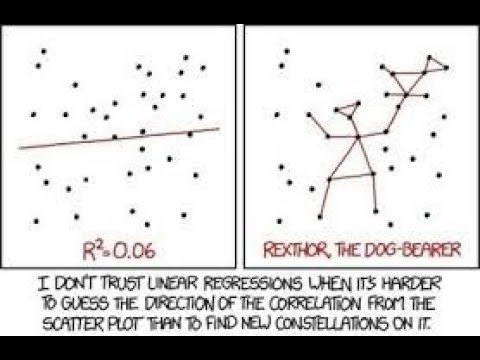

In [2]:
import plotly.io as pio

pio.renderers

from IPython.display import YouTubeVideo
YouTubeVideo('F-Z6p87Fifs')

# Importing necessary modules

In [3]:
import random as rnd # The random number generator module
import numpy as np # random number generator module and some other tools
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module
import statistics # built-in statistics module
import math # mathematics built-in module
import sys
print("User Current Version:-", sys.version) # Checking system version

pio.renderers.default = "png" # setting png as default so images appear in github

User Current Version:- 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


# Perfect linear relation

In [4]:
def linear(a,b,x):
  return a*x+b

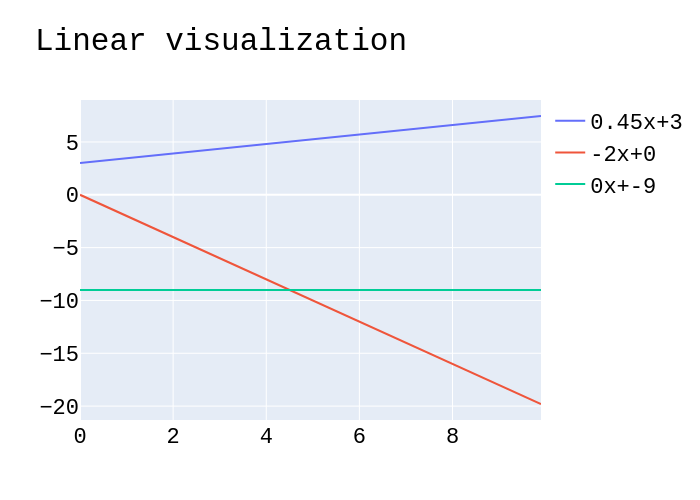

In [5]:
x = np.arange(0,10,0.1) # Generating x
a = 0.45 # Setting an angular coefficient
b = 3 # Setting a linear coefficient
fig = go.Figure() # Starting the figure
fig.add_trace(go.Scatter(x = x, y = linear(a,b,x),  name = f"{a}x+{b}")) # Plotting the trace 1
a = -2 # A different angular coefficient
b = 0 # # A different linear coeficcient
fig.add_trace(go.Scatter(x = x, y = linear(a,b,x),  name = f"{a}x+{b}")) # Plotting the trace 2
a = 0 
b = -9
fig.add_trace(go.Scatter(x = x, y = linear(a,b,x),  name = f"{a}x+{b}")) # Plotting the trace 3
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ),
    title = "Linear visualization",
) # Changing the font and adding the title

fig.show() # Shows figure



# Iterative search

## Random search

In this part, we generate two samples of size $amnt$, with $1000$ numbers set as default, and search all the possible combinations between samples for the best one.

The quality of fit is controlled by a calculation of the mean of abosulte difference between samples.

In [6]:
def random_search(x, y, amnt = 1000, a0 = 0, b0 = 0):
  a = np.random.uniform(a0-100, a0+100, amnt) # Generating the random numbers for a and b, where a0 and b0 are initial guesses
  b = np.random.uniform(b0-100, b0+100, amnt)
  error = np.mean(abs(y - linear(a[0], b[0], x))) # Calculating the first error
  la = [] # list used forward to animate the search
  lb = []
  for i in a:
    for j in b:
      new_error = np.mean(abs(y - linear(i, j, x))) # Calculates if the new error with different parameters is smaller then before
      if new_error < error: # If it is, store in the list
        la.append(i)
        lb.append(j)
        error = new_error
  return la,lb, error # return the list and the final error


Vector size: 39


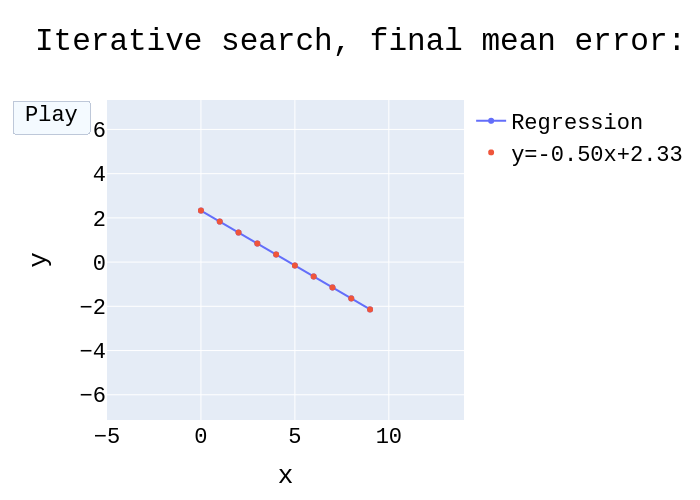

In [7]:
np.random.seed(8666) # Setting the RNG seed
a1 = np.random.uniform(-5,5) # Generate a random a and b
b1 = np.random.uniform(-5,5)
x = np.arange(0,10,1) # Grab a sample of x from 0 to 10
y = linear(a1,b1,x) # and calculate the y(x) associated

a,b,error = random_search(x,y) # make the search
print(f"Vector size: {len(a)}") # shows how many times the combination's error is smaller then the previous one 
fig = go.Figure(data = [go.Scatter(x = x,  # Plotting the figure and making the animation
                           y = y, 
                           name = f"Regression", 
                           mode = "markers+lines",
                           ),
                        go.Scatter(x = x, 
                           y = y, 
                           name = f"y={a1:.2f}x+{b1:.2f}", 
                           mode = "markers",
                           )],
                layout = go.Layout(font=dict(
                                  family="Courier New, monospace",
                                  size=22,
                                  color="Black"
                                  
                              ),
                              xaxis=dict(range=[min(x)-5, max(x)+5], autorange=False, zeroline=False),
                              yaxis=dict(range=[min(y)-5, max(y)+5], autorange=False, zeroline=False),
                              updatemenus=[dict(
                                                                  type="buttons",
                                                                  buttons=[dict(label="Play",
                                                                                method="animate",
                                                                                args=[None])])],
                              xaxis_title="x",
                              yaxis_title="y",
                              title = f"Iterative search, final mean error: {error:.2f}"),
                frames=[go.Frame(data=[go.Scatter(x=x,
                                                  y=linear(a[i], b[i], x),
                                                  mode = "lines",
                                                  name = f"y = {a[i]:.2f}x+{b[i]:.2f}",
                                                  error_y = dict(type = 'data',
                                                      array = (y - linear(a[i], b[i], x)),
                                                      arrayminus = np.zeros(len(a)))
                )
                ]) for i in range(len(a))],

                )
fig.show()

# the vertical bars are the difference between the line and the data

### Conclusion

Can take a long time to find a good $a$ value, or even never find one since it is randomly generated. Not a good fitting tool. 

## Noise
What is noise: Noise is meaningless information added to the data by external factors out of our control. We can't count on 100% precise data since there is a limit to the precision when measuring. External factors can be faulty equipment, causing systematic failures, or even the person measuring doing it wrong.

We can't disregard data noise since it will always be present anywhere, when measuring real world data.

X: [0 1 2 3 4 5 6 7 8 9]
Y: [ 0  3  6  9 12 15 18 21 24 27]


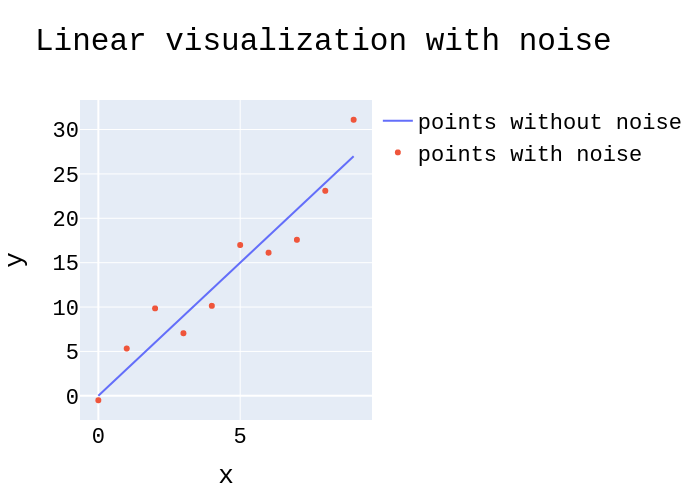

In [8]:
np.random.seed(8666) # Resetting the seed
x = np.arange(0,10,1) # Remaking the x
y = linear(3,0,x) # Calculating the y(x) associated, with a = 3 and b = 0
y1 = y + np.random.uniform(-5, 5, int(10)) # adding random noise

print(f"X: {x}")
print(f"Y: {y}")
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = y, name = f"points without noise", mode = "lines"))
fig.add_trace(go.Scatter(x = x, y = y1, name = f"points with noise", mode = "markers"))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
        
    ),
    xaxis_title="x",
    yaxis_title="y",
    title = "Linear visualization with noise",
)
fig.show()

Making each pair of points as a line to fit the curve.

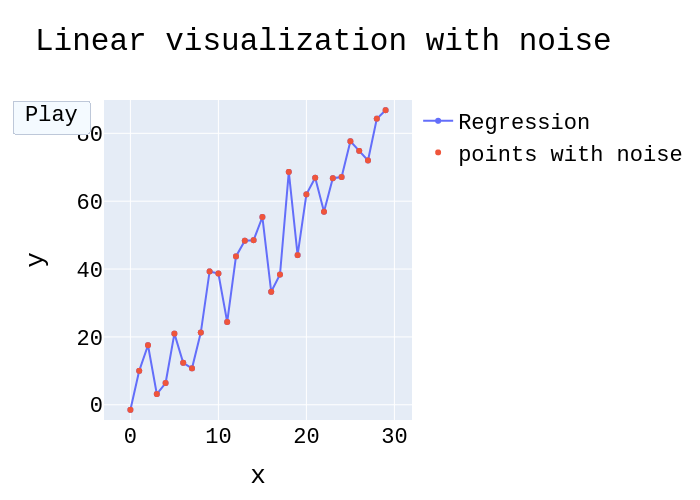

In [9]:
np.random.seed(8666)
x = np.arange(0,30,1)
err = 15
y = linear(3,0,x) + np.random.uniform(-err, err, int(30))
fig = go.Figure(data = [go.Scatter(x = x, 
                           y = y, 
                           name = f"Regression", 
                           mode = "markers+lines",
                           ),
                        go.Scatter(x = x, 
                           y = y, 
                           name = f"points with noise", 
                           mode = "markers",
                           )],
                layout = go.Layout(font=dict(
                                  family="Courier New, monospace",
                                  size=22,
                                  color="Black"
                                  
                              ),
                              xaxis=dict(range=[min(x)-3, max(x)+3], autorange=False, zeroline=False),
                              yaxis=dict(range=[min(y)-3, max(y)+3], autorange=False, zeroline=False),
                              updatemenus=[dict(
                                                                  type="buttons",
                                                                  buttons=[dict(label="Play",
                                                                                method="animate",
                                                                                args=[None])])],
                              xaxis_title="x",
                              yaxis_title="y",
                              title = "Linear visualization with noise"),
                frames=[go.Frame(data=[go.Scatter(x=x,
                                                  y=linear((y[i]-y[0])/(x[i]-x[0]), 0, x),
                                                  mode = "lines", 
                                                  name = f"Mean error {np.mean(abs(y-linear((y[i]-y[0])/(x[i]-x[0]), 0, x))):.2f}",
                                                  error_y = dict(type = 'data',
                                                      array = (y - linear((y[i]-y[0])/(x[i]-x[0]), 0, x)),
                                                      arrayminus = np.zeros(10))
                )
                ]) for i in range(1,30)],

                )
fig.show()

# the vertical bars are the difference between the line and the data

In here we can see that the using a pair of points to calculate an angular and linear coefficient can result in a good initial guess. Still, not a good fit of the curve.

So we searched between those iterations to see which one would be the best fit.

In [10]:
def fit(x, y): # The function searching
  a0 = [(y[1]-y[0])/(x[1]-y[0])] # calculates a first value of a between a pair of points
  b0 = [y[0]-a0[-1]*x[0]] # and the b associated
  error = np.mean(abs(linear(a0[-1],b0[-1],x) - y)) # calculates its error
  for i in range(len(x)): # to iterate every point
    for j in range(i, len(x)): # from i forward to not repeat already done iterations
      at = (y[j]-y[i])/(x[j]-y[i])
      bt = y[j]-at*x[j]
      # print(bt,at)
      if np.mean(abs(linear(at, bt, x)-y)) < error: # if the mean of the absolute error is smaller than the previous one, change
        a0.append(at)
        b0.append(bt)
        error = np.mean(abs(linear(at, bt, x)-y))
  return a0, b0, error

Now, to test it

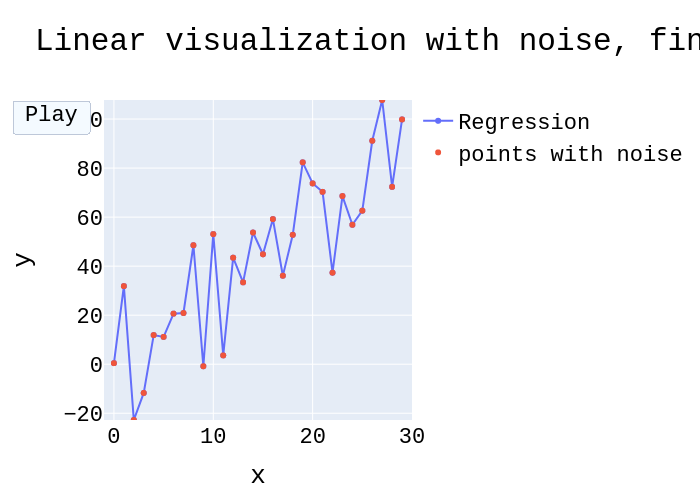

In [11]:
np.random.seed(866)
x = np.arange(0,30,1)
err = 30 # interval where the uniform numbers will be generated
y = linear(3,0,x) + np.random.uniform(-err, err, int(30)) # generating the numbers

a,b,error = fit(x, y) # fitting

fig = go.Figure(data = [go.Scatter(x = x, # and plotting
                           y = y, 
                           name = f"Regression", 
                           mode = "markers+lines",
                           ),
                        go.Scatter(x = x, 
                           y = y, 
                           name = f"points with noise", 
                           mode = "markers",
                           )],
                layout = go.Layout(font=dict(
                                  family="Courier New, monospace",
                                  size=22,
                                  color="Black"
                                  
                              ),
                              xaxis=dict(range=[min(x)-1, max(x)+1], autorange=False, zeroline=False),
                              yaxis=dict(range=[min(y), max(y)], autorange=False, zeroline=False),
                              updatemenus=[dict(
                                                                  type="buttons",
                                                                  buttons=[dict(label="Play",
                                                                                method="animate",
                                                                                args=[None])])],
                              xaxis_title="x",
                              yaxis_title="y",
                              title = f"Linear visualization with noise, final mean error: {error:.2f}"),
                frames=[go.Frame(data=[go.Scatter(x=x,
                                                  y=linear(a[i], b[i], x),
                                                  mode = "lines",
                                                  error_y = dict(type = 'data',
                                                      array = (y - linear(a[i], b[i], x)),
                                                      arrayminus = np.zeros(len(a)))
                )
                ]) for i in range(len(a))],

                )
fig.show()

# the vertical bars are the difference between the line and the data

Now with a multiplicative error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars



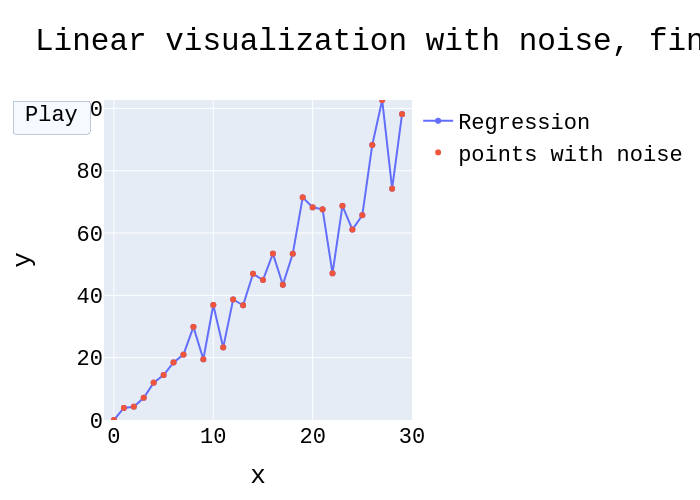

In [12]:
np.random.seed(866)
x = np.arange(0,30,1)
err = 0.3
y = linear(3,0,x)*(1+np.random.uniform(-err, err, int(30)))

a,b,error = fit(x, y)

fig = go.Figure(data = [go.Scatter(x = x, 
                           y = y, 
                           name = f"Regression", 
                           mode = "markers+lines",
                           ),
                        go.Scatter(x = x, 
                           y = y, 
                           name = f"points with noise", 
                           mode = "markers",
                           )],
                layout = go.Layout(font=dict(
                                  family="Courier New, monospace",
                                  size=22,
                                  color="Black"
                                  
                              ),
                              xaxis=dict(range=[min(x)-1, max(x)+1], autorange=False, zeroline=False),
                              yaxis=dict(range=[min(y), max(y)], autorange=False, zeroline=False),
                              updatemenus=[dict(
                                                                  type="buttons",
                                                                  buttons=[dict(label="Play",
                                                                                method="animate",
                                                                                args=[None])])],
                              xaxis_title="x",
                              yaxis_title="y",
                              title = f"Linear visualization with noise, final mean error: {error:.2f}"),
                frames=[go.Frame(data=[go.Scatter(x=x,
                                                  y=linear(a[i], b[i], x),
                                                  mode = "lines", 
                                                  error_y = dict(type = 'data',
                                                      array = (y - linear(a[i], b[i], x)),
                                                      arrayminus = np.zeros(len(a)))
                )
                ]) for i in range(len(a))],

                )
fig.show()

# the vertical bars are the difference between the line and the data

And both types of error

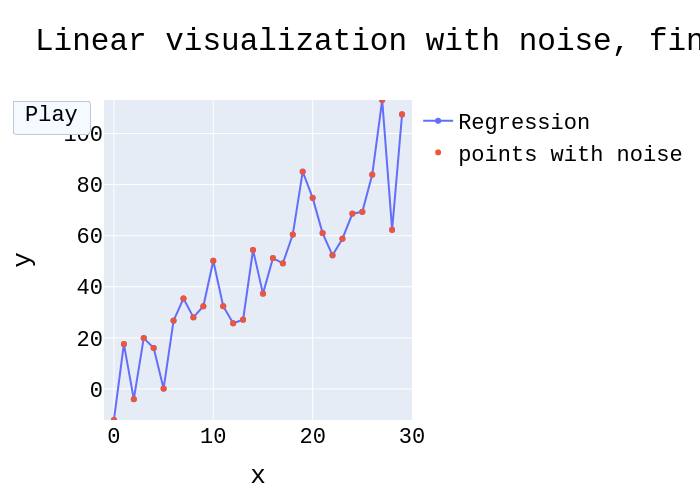

In [13]:
np.random.seed(866)
x = np.arange(0,30,1)
err = 0.3
y = linear(3,0,x)*(1+np.random.uniform(-err, err, int(30)))+np.random.uniform(-15, 15, int(30))

a,b,error = fit(x, y)

fig = go.Figure(data = [go.Scatter(x = x, 
                           y = y, 
                           name = f"Regression", 
                           mode = "markers+lines",
                           ),
                        go.Scatter(x = x, 
                           y = y, 
                           name = f"points with noise", 
                           mode = "markers",
                           )],
                layout = go.Layout(font=dict(
                                  family="Courier New, monospace",
                                  size=22,
                                  color="Black"
                                  
                              ),
                              xaxis=dict(range=[min(x)-1, max(x)+1], autorange=False, zeroline=False),
                              yaxis=dict(range=[min(y), max(y)], autorange=False, zeroline=False),
                              updatemenus=[dict(
                                                                  type="buttons",
                                                                  buttons=[dict(label="Play",
                                                                                method="animate",
                                                                                args=[None])])],
                              xaxis_title="x",
                              yaxis_title="y",
                              title = f"Linear visualization with noise, final mean error: {error:.2f}"),
                frames=[go.Frame(data=[go.Scatter(x=x,
                                                  y=linear(a[i], b[i], x),
                                                  mode = "lines", 
                                                  error_y = dict(type = 'data',
                                                      array = (y - linear(a[i], b[i], x)),
                                                      arrayminus = np.zeros(len(a)))
                )
                ]) for i in range(len(a))],

                )
fig.show()

# the vertical bars are the difference between the line and the data

### Conclusion

Not so bad at finding a good line to fit the paramets, but still seems lacking. Need a better way to evaluate the error and the fit itself.

## Testing the means and variances of different types of noise

In this part, we test the difference between the means and variance between each type of noise. First we generate a set without any noise and calculates the mean value, after that we input an additive, multiplicative and both types of noise to the data and watch the impact.

This test is made $10^5$ times, so what is being compared is the mean of means, and the mean os variances, against the mean of the unaltered data and the variance.

In [14]:
np.random.seed(8666)
x = np.arange(0,30,1)
err_m = 0.3
err_a = 30
y = linear(3,0,x)
multi = [[],[]]
add = [[],[]]
both = [[],[]]
for i in range(int(1e5)):
  reject = linear(3,0,x)*(1+np.random.uniform(-err_m, err_m, int(30)))
  multi[0].append(np.mean(reject))
  multi[1].append(np.var(reject))
  reject = linear(3,0,x)+np.random.uniform(-err_a, err_a, int(30))
  add[0].append(np.mean(reject))
  add[1].append(np.var(reject))
  reject = linear(3,0,x)*(1+np.random.uniform(-err_m, err_m, int(30)))+np.random.uniform(-err_a, err_a, int(30))
  both[0].append(np.mean(reject))
  both[1].append(np.var(reject))

print(f""" Original data:
Mean: {np.mean(y)},
Variance: {np.var(y)}""")
print("\n\n")
print(f""" Multiplicative noise data:
Mean of means: {np.mean(multi[0])},
Mean of variances: {np.mean(multi[1])}""")
print("\n\n")
print(f""" Additive noise data:
Mean of means: {np.mean(add[0])},
Mean of variances: {np.mean(add[1])}""")
print("\n\n")
print(f""" Both noises data:
Mean of means: {np.mean(both[0])},
Mean of variances: {np.mean(both[1])}""")

 Original data:
Mean: 43.5,
Variance: 674.25



 Multiplicative noise data:
Mean of means: 43.50260001621491,
Mean of variances: 748.7499377211861



 Additive noise data:
Mean of means: 43.493327224588405,
Mean of variances: 963.9922181425906



 Both noises data:
Mean of means: 43.527147761993085,
Mean of variances: 1038.1377478890934


### Conclusion

All means seems to be very close one to another, while the variances change a lot, going from $674$ to $1038$ when adding both types of noises.

This is a expected behaviour when adding a symmetrical noise to data, since it is going to give and take the same amount, when treatint large numbers.